# WEEK 2 BIG PROJECT: E-Commerce Customer Insight Analysis

## Business Context:
We have customer transaction data. The CEO aims to identify our most valuable customers, understand loyalty trends, and assist marketing in targeting the right segments.

### Goals:
### 1. Segment customers by loyalty tier
### 2. Identify spending patterns across regions
### 3. Detect seasonal trends
### 4. Understand customer demographics and domain behavior
### 5. Deliver visuals and a basic dashboard for presentation


# ---

### STEP 1: Data Loading & Basic Cleaning

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
file_path = r"C:\Users\Admin\OneDrive\Desktop\Warpath28\week2_big_project_data.csv"
df = pd.read_csv(file_path)
df.head()

,Customer_ID,Email,Gender,Region,Product,Category,Quantity,Price,Date,CLV
0,CUST0001,user1@outlook.com,Male,West,Laptop,Electronics,3,2146,2023-01-01,6438
1,CUST0002,user2@bizmail.com,Female,West,Accessory,Gadgets,1,1418,2023-01-02,1418
2,CUST0003,user3@gmail.com,Male,East,Accessory,Electronics,2,2910,2023-01-03,5820
3,CUST0004,user4@outlook.com,Male,North,Smartphone,Electronics,3,2274,2023-01-04,6822
4,CUST0005,user5@outlook.com,Female,West,Tablet,Gadgets,1,2031,2023-01-05,2031


In [28]:
# Clean email
df['Email'] = df['Email'].str.strip().str.lower()

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Initial shape and preview
print("Shape:", df.shape)
df.head()

Shape: (200, 12)


,Customer_ID,Email,Gender,Region,Product,Category,Quantity,Price,Date,CLV,Month,Year
0,CUST0001,user1@outlook.com,Male,West,Laptop,Electronics,3,2146,2023-01-01,6438,1,2023
1,CUST0002,user2@bizmail.com,Female,West,Accessory,Gadgets,1,1418,2023-01-02,1418,1,2023
2,CUST0003,user3@gmail.com,Male,East,Accessory,Electronics,2,2910,2023-01-03,5820,1,2023
3,CUST0004,user4@outlook.com,Male,North,Smartphone,Electronics,3,2274,2023-01-04,6822,1,2023
4,CUST0005,user5@outlook.com,Female,West,Tablet,Gadgets,1,2031,2023-01-05,2031,1,2023


# ---

### STEP 2: Customer Segmentation by CLV

In [29]:
# Create tiers
def assign_tier(x):
    if x > 4000:
        return "Elite"
    elif x > 2000:
        return "Gold"
    else:
        return "Member"

# Add Tier column
df['Tier'] = df['CLV'].apply(assign_tier)

# Preview tiers
df['Tier'].value_counts()


Tier
Elite     102
Gold       61
Member     37
Name: count, dtype: int64

# ---

### STEP 3: Top Performing Customers

In [30]:
# Sort by CLV and view top 10 customers
top_customers = df.sort_values(by='CLV', ascending=False).head(10)

print("Top 10 Most Valuable Customers:")
print(top_customers[['Customer_ID', 'CLV', 'Tier', 'Region']])

Top 10 Most Valuable Customers:
    Customer_ID    CLV   Tier Region
26     CUST0027  11100  Elite  North
80     CUST0081  10748  Elite   West
25     CUST0026  10632  Elite  North
196    CUST0197  10280  Elite  North
183    CUST0184  10248  Elite  South
82     CUST0083  10192  Elite  North
90     CUST0091  10104  Elite   West
63     CUST0064  10084  Elite  North
108    CUST0109   9772  Elite   West
97     CUST0098   9768  Elite   West


# ---

### STEP 4: Loyalty Tier Distribution Across Regions

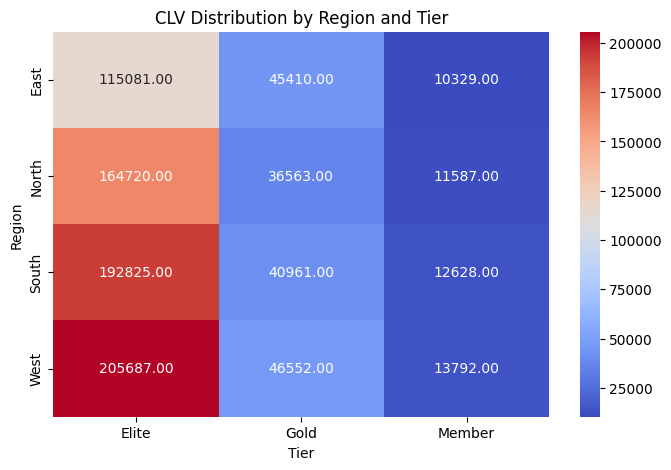

In [31]:
heatmap_data = df.groupby(['Region', 'Tier'])['CLV'].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='Region', columns='Tier', values='CLV')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_pivot, annot=True, cmap='coolwarm',fmt='.2f')
plt.title("CLV Distribution by Region and Tier")
plt.show()

# ---

### STEP 5: Monthly Sales Trends

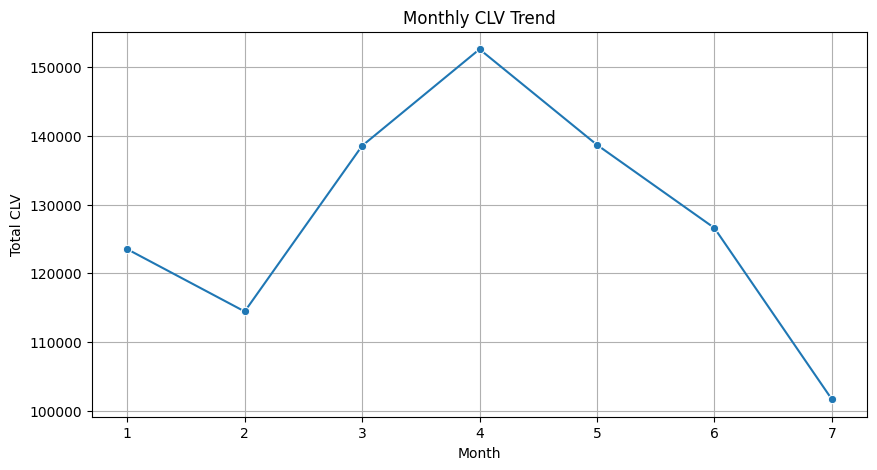

In [32]:
monthly_sales = df.groupby('Month')['CLV'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='CLV', marker='o')
plt.title("Monthly CLV Trend")
plt.xlabel("Month")
plt.ylabel("Total CLV")
plt.grid(True)
plt.show()

# ---

### STEP 6: Demographic Breakdown

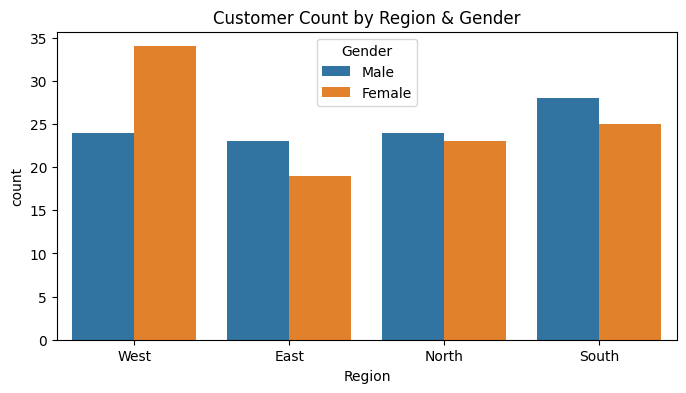

In [33]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Region', hue='Gender')
plt.title("Customer Count by Region & Gender")
plt.show()

# ---

### STEP 7: Find High-Potential Customers in Lower Tiers

In [34]:
potential_elites = df[(df['CLV'] > 3000) & (df['Tier'] != 'Elite')]
print("High-CLV Customers in Lower Tiers:")
print(potential_elites[['Customer_ID', 'CLV', 'Tier']].head())

High-CLV Customers in Lower Tiers:
   Customer_ID   CLV  Tier
14    CUST0015  3508  Gold
33    CUST0034  3610  Gold
39    CUST0040  3624  Gold
60    CUST0061  3435  Gold
65    CUST0066  3928  Gold


# ---

### STEP 8: Most Common Email Domains Among Top Customers

In [35]:
df['Domain'] = df['Email'].str.split('@').str[1]
top_domains = df.groupby('Domain')['CLV'].sum().sort_values(ascending=False).head(5)

print("Top 5 Email Domains by CLV:")
print(top_domains)

Top 5 Email Domains by CLV:
Domain
outlook.com    240794
gmail.com      223685
bizmail.com    217459
yahoo.com      214197
Name: CLV, dtype: int64


# ---

### STEP 9: Basic Dashboard Visuals (Stacked Bar)

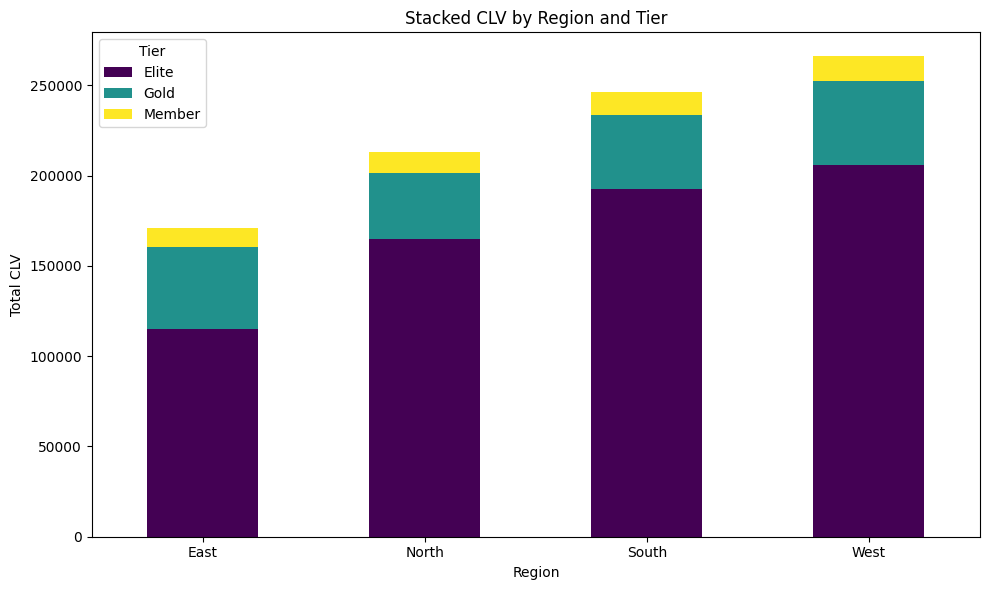

In [36]:
summary = df.groupby(['Region', 'Tier'])['CLV'].sum().unstack()
summary.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Stacked CLV by Region and Tier")
plt.ylabel("Total CLV")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.legend(title="Tier")
plt.tight_layout()
plt.show()

# ---

## FINAL REMARKS
### Final Insights:
- Elite customers are concentrated in [Region with highest Elite CLV].
- Sales peak around [Top Month by CLV].
- Most top customers use [Most common domain].
- Gender distribution is fairly even / skewed depending on output.
- There are 5 customers with Elite-tier potential stuck in Gold/Member.

This notebook presents insights ready to pitch to a stakeholder or team.
Clean, visual, and insightful.
While not perfect, this project reflects my evolving skillset. I approach each challenge with curiosity, persistence, and a willingness to adapt!

--> Rehan  